# Analysis of Topic Modelling Results for University of Tymen mentions in social media Vkontakte

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns           
import umap

from tqdm.notebook import tqdm_notebook
from wordcloud import WordCloud

from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering

import pickle
import gensim
import matplotlib
%matplotlib inline

import sys
sys.path.append('../')
from src.utils import (
    plot_word_cloud, 
    get_umap_representation,
    plot_distortions,
    plot_dendrogram
)

c:\users\зима\appdata\local\programs\python\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# loading the model
model = gensim.models.LdaModel.load('models/test_model_20_topics')
topics = model.show_topics(num_topics=20, num_words=50, formatted=False)

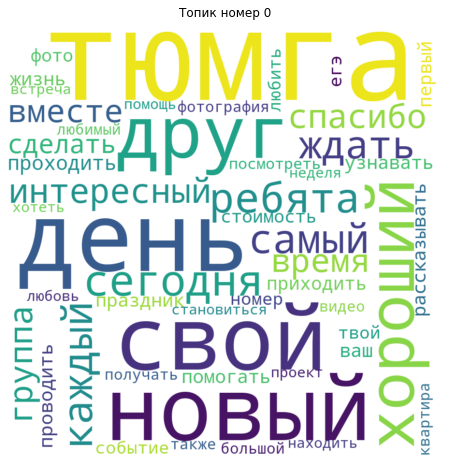

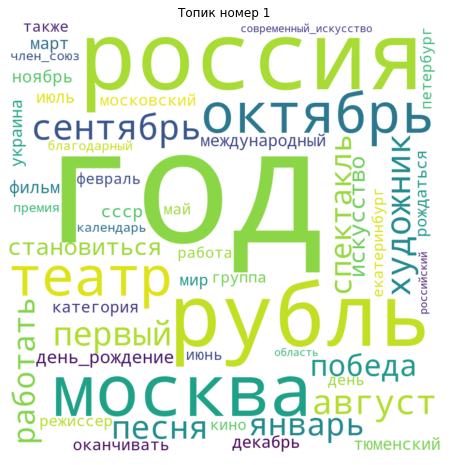

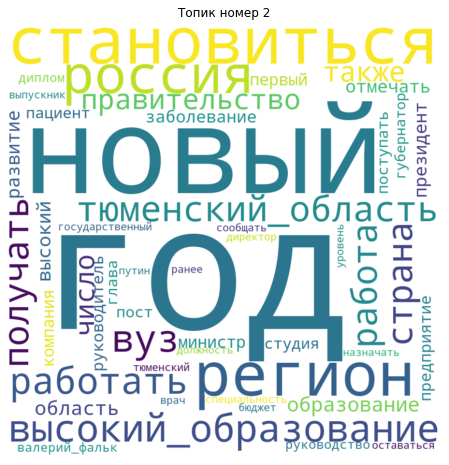

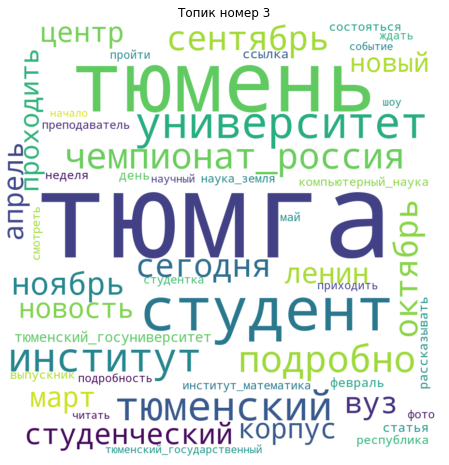

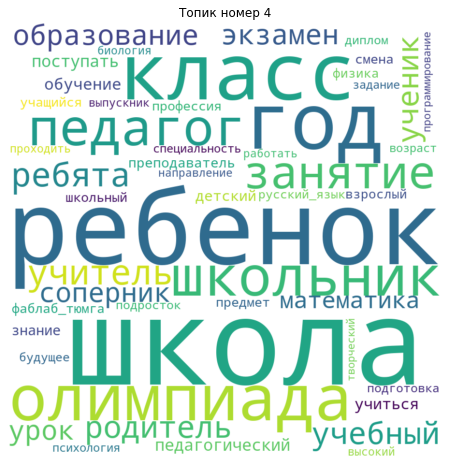

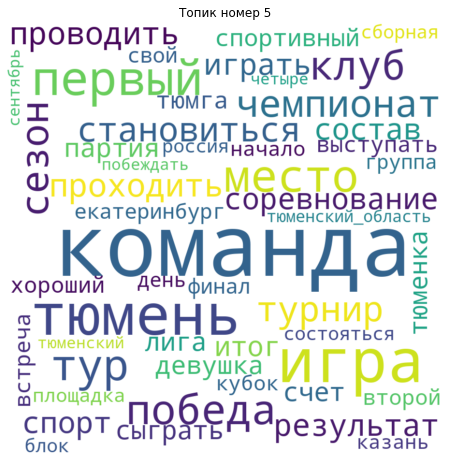

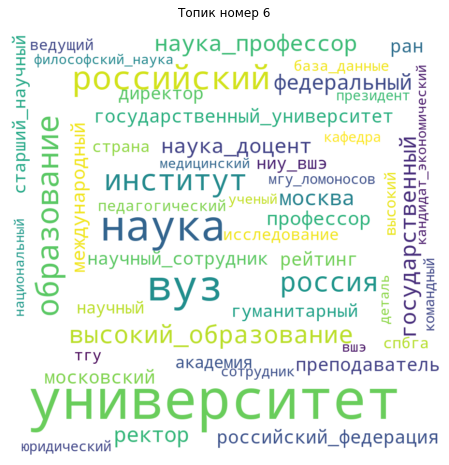

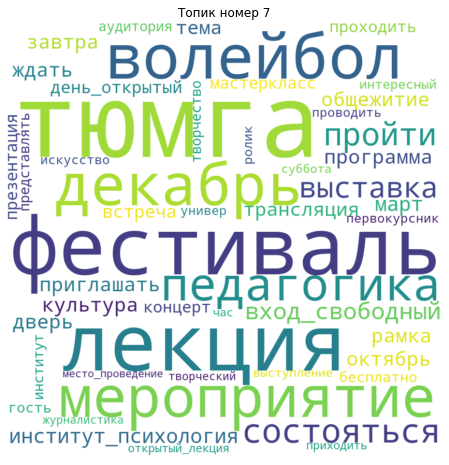

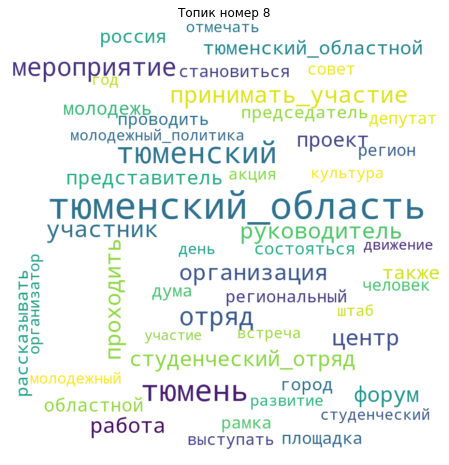

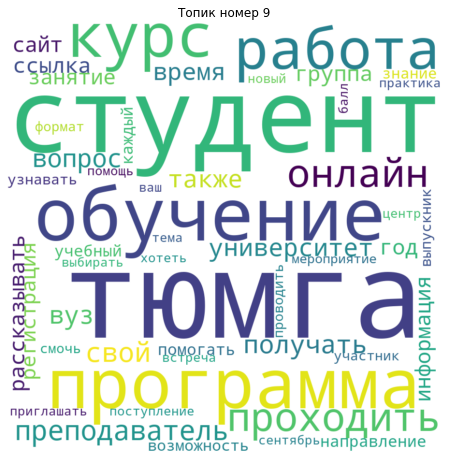

In [3]:
#Plotting word clouds for each topic
#The bigger the word, the more frequently it is used in the text, colors have no meaning
for topic_number in range(10):
    plot_word_cloud(topics, topic_number)

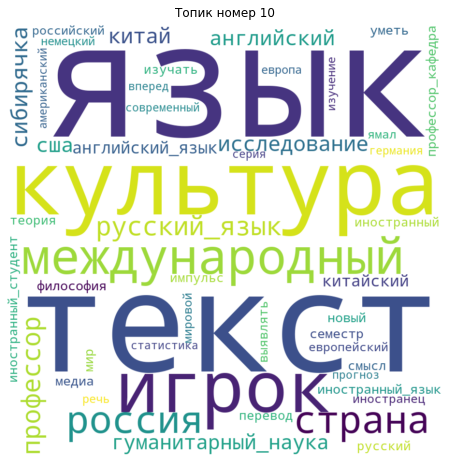

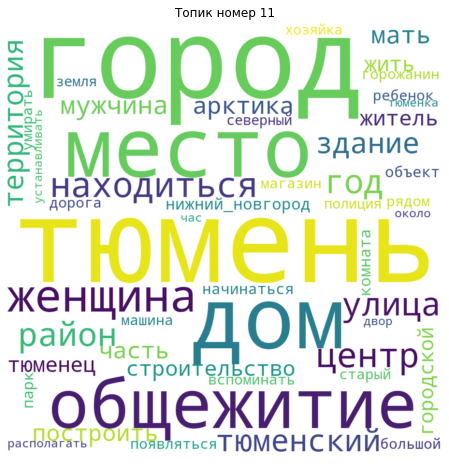

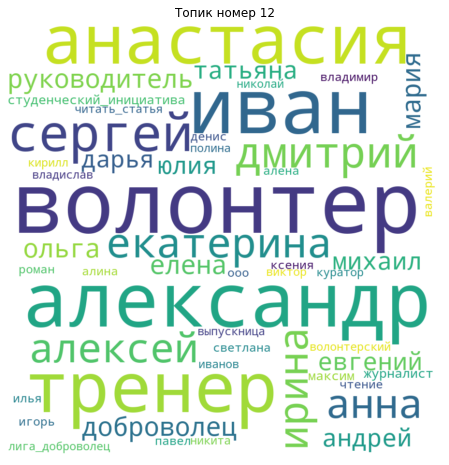

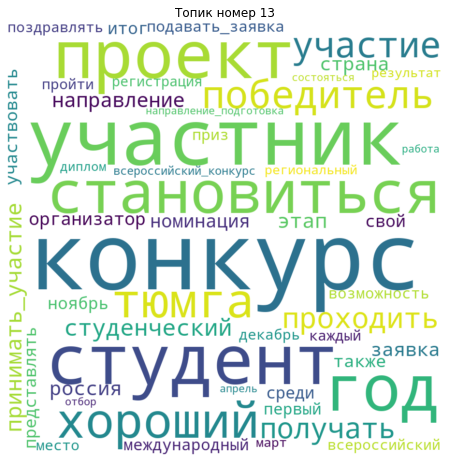

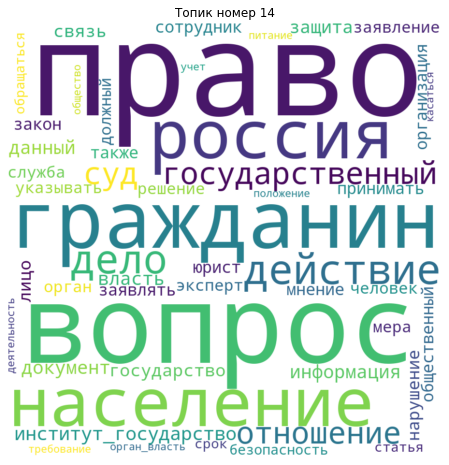

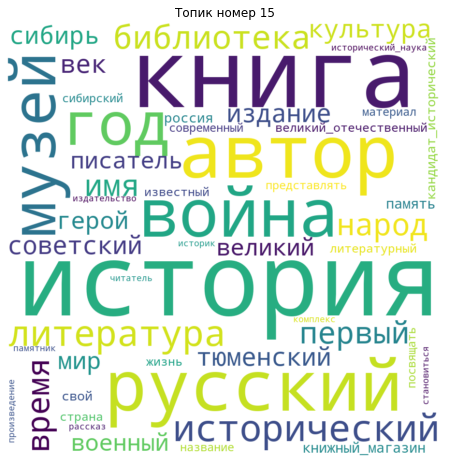

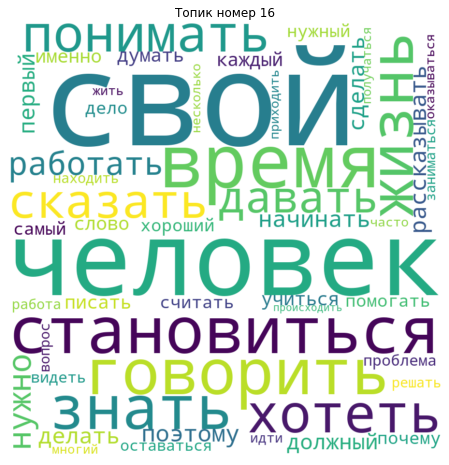

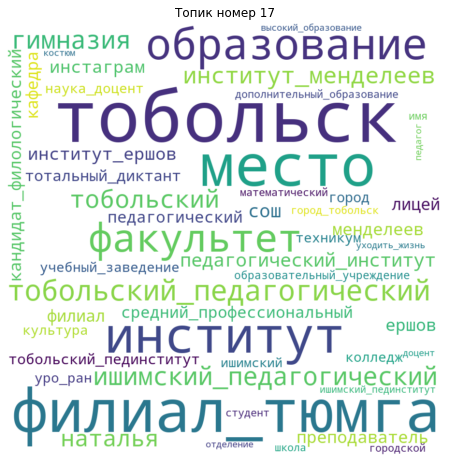

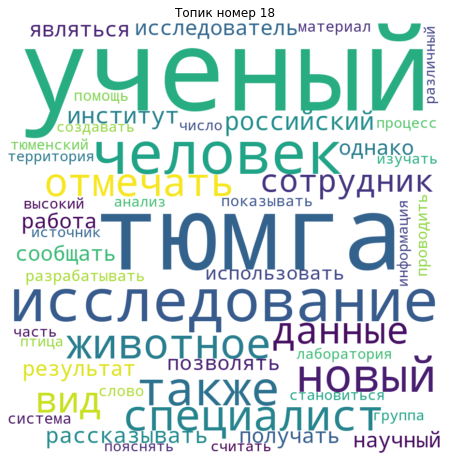

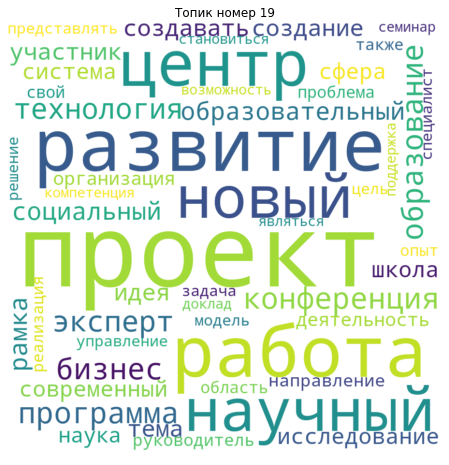

In [4]:
for topic_number in range(10, 20):
    plot_word_cloud(topics, topic_number)

In [5]:
#Assignment of topic names
themes_20 = {
    0: #'приглашения_на_студенческие_мероприятия'
    'student_life',
    1: #'искусство'
    'art',
    2: #'взаимодействие_с_властью'
    'authorities_interaction',
    3: #'мероприятия_точные_науки'
    'STEM_events',
    4: #'мероприятия_для_школьников'
    'school_events',
    5: #'спорт'
    'sport',
    6: #'межвузовское_взаимодействие'
    'inter-university cooperation',
    7: #'открытые_мероприятия'
    'open doors',
    8: #'молодежная_региональная_политика'
    'regional_youth_policy',
    9: #'образовательный_процесс'
    'education_processes',
    10: #'лингвистика_и_мировая_культура'
    'linguistics_and_world_culture',
    11: #'жилищные_вопросы'
    'accomodation_issues',
    12: #'волонтерство'
    'volunteering',
    13: #'участие_в_конкурсах'
    'competition_participation',
    14: #'гражданское_общество'
    'civil_society',
    15: #'история_и_война'
    'history_and_war',
    16: #'человек_действия'
    'person_actions', #слишком общее, удалить тему
    17: #'филиалы'
    'branches',
    18: #'наука'
    'science',
    19: #'развитие_университета'
    'university_development',
}

In [6]:
#Loading the corpus
with open('models/corpus', 'rb') as f:
    corpus = pickle.load(f)

In [8]:
#Linking texts with topics probability
%%time
topic_vectors = pd.DataFrame([dict(i) for i in model.get_document_topics(corpus, minimum_probability=0)])

In [9]:
data = pd.read_pickle('data/posts_2011_2020_processed.pkl')

In [10]:
assert data.shape[0] == topic_vectors.shape[0]
data = pd.concat([data, topic_vectors], axis=1)
data.head()

id                date   owner_id  \
0     66 2011-12-03 10:18:00   -1243876   
1  10588 2012-03-19 13:58:45     695803   
2    800 2012-04-10 04:55:40  102648080   
3   5810 2012-05-07 06:49:16   70549719   
4   5003 2012-11-12 11:10:00   61866128   

                                                text  likes  reposts  \
0  ГОЛОСУЕМ ЗА БОГУ!!\n\n"Дорогие друзья! Голосуй...      6        1   
1  Позавчера я написал пост про то, как мы заехал...      8        3   
2  В эти минуты идет прямая трансляция лекции про...      2        1   
3  12 апреля 2012 г. в Тюменском государственном ...      1        1   
4  Дорогие друзья, журнал "ЕГОРКА" участвует в ко...      2        1   

   comments                                      txt_processed  \
0         1  голосуем за богу дорогие друзья голосуйте за м...   
1        16  позавчера я написал пост про то как мы заехали...   
2         0  в эти минуты идет прямая трансляция лекции про...   
3         0  апреля г в тюменском государственном университ...   
4         2  дорогие друзья журнал егорка участвует в конку...   

                                    lines_lemmatized  year  ...        10  \
0  ['iv', 'международный', 'фестиваль', 'документ...  2011  ...  0.014848   
1  ['позавчера', 'написать', 'пост', 'заезжать', ...  2012  ...  0.031003   
2  ['минута', 'идти', 'прямой', 'трансляция', 'ле...  2012  ...  0.002386   
3  ['апрель', 'г', 'тюменский', 'государственный'...  2012  ...  0.005003   
4  ['дорогой', 'друг', 'журнал', 'егорка', 'участ...  2012  ...  0.003572   

         11        12        13        14        15        16        17  \
0  0.082787  0.023497  0.043409  0.023560  0.161633  0.099090  0.005081   
1  0.170931  0.000211  0.000211  0.054251  0.045712  0.530759  0.000211   
2  0.002386  0.002386  0.002386  0.002386  0.002386  0.002386  0.002386   
3  0.005003  0.005003  0.005003  0.005003  0.005003  0.005003  0.005003   
4  0.003572  0.003572  0.161702  0.003572  0.083394  0.003572  0.003572   

         18        19  
0  0.014944  0.062829  
1  0.000211  0.000211  
2  0.002386  0.002386  
3  0.005003  0.370648  
4  0.003572  0.003572  

[5 rows x 31 columns]

Topic modelling algorithm does not assign one text to one topic, but rather counts the probability that this text belongs to each topic. Here, the texts dataset is merged with its probability rates in order to perform further analysis.

# Clustering by year

In [11]:
col_list = [x for x in range(0,20)]

In [12]:
topics_by_year = data.groupby(['year'])[col_list].mean()
umap_by_year = get_umap_representation(topics_by_year)

c:\users\зима\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [13]:
topics_by_year.head()

0         1         2         3         4         5         6   \
year                                                                         
2011  0.106591  0.027134  0.037978  0.153826  0.019441  0.057626  0.054138   
2012  0.118887  0.037102  0.039794  0.150815  0.028678  0.064362  0.039451   
2013  0.120614  0.039069  0.069437  0.114054  0.023734  0.051569  0.042433   
2014  0.123255  0.042098  0.044494  0.135870  0.029690  0.063940  0.050233   
2015  0.107412  0.039862  0.049913  0.103565  0.028500  0.061999  0.049994   

            7         8         9         10        11        12        13  \
year                                                                         
2011  0.057533  0.027162  0.100768  0.019261  0.027932  0.042043  0.050339   
2012  0.036809  0.026334  0.080027  0.012922  0.029814  0.026763  0.067943   
2013  0.031707  0.033483  0.073407  0.019784  0.037134  0.025409  0.043236   
2014  0.047139  0.036068  0.069858  0.021257  0.027332  0.026479  0.043240   
2015  0.037962  0.053454  0.091268  0.019403  0.025788  0.028951  0.056466   

            14        15        16        17        18        19  
year                                                              
2011  0.052563  0.030221  0.052335  0.021307  0.030055  0.031746  
2012  0.018629  0.037658  0.104422  0.023718  0.026085  0.029786  
2013  0.031708  0.041483  0.109497  0.018579  0.033629  0.040036  
2014  0.030654  0.037312  0.080353  0.017599  0.026240  0.046889  
2015  0.022111  0.051435  0.067866  0.024656  0.025759  0.053636

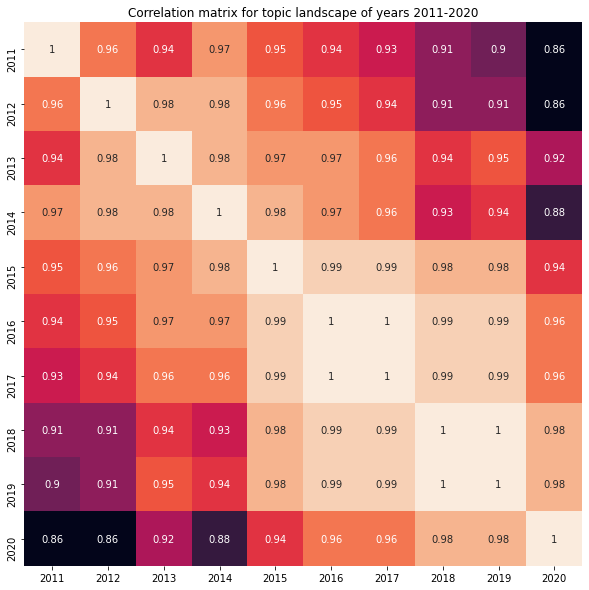

In [14]:
indeces = topics_by_year.index
plt.figure(figsize=(10, 10))
plt.title('Correlation matrix for topic landscape of years 2011-2020')
sns.heatmap(
    np.round(cosine_similarity(topics_by_year),2), 
    annot=True, 
    xticklabels=indeces, 
    yticklabels=indeces,
    cbar=None
)
plt.show()

Here, you can see the rates of similarity for each year on the Y axis with each year on the X axis. The lighter the square, the more similar these years are and vice versa. For example, years 2016 and 2017 as well as 2018 and 2019 are practically identical in topics. Whereas year 2011 or 2012 have major differences with year 2020.<br><br>
The plot clearly shows that there are two groups of similar years by topic landscape: (1) 2011-2014, and (2) 2015-2020. This confirms the assumption that the information field around University of Tyumen befor and after entering 5-100 Project is different.

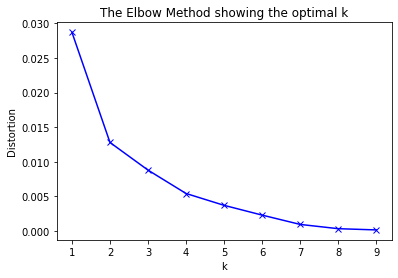

In [15]:
plot_distortions(topics_by_year)

According to Elbow Method, the optimal k is 2, which signifies that there are two periods of time with highly different topic landscapes.

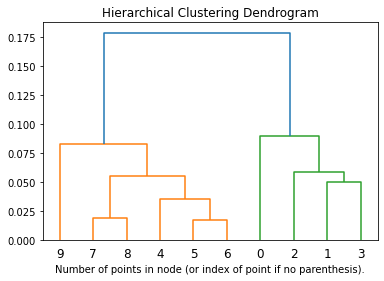

In [16]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(topics_by_year)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

According to this hierarchical clustering, there may be identified two groups: 2011-2014 (green branches with indices from 0 to 3 on the nodes) and 2015-2020 (correspond to orange branches with indices 6-9).

In [17]:
model = AgglomerativeClustering(n_clusters=2)
model.fit(topics_by_year)

AgglomerativeClustering()

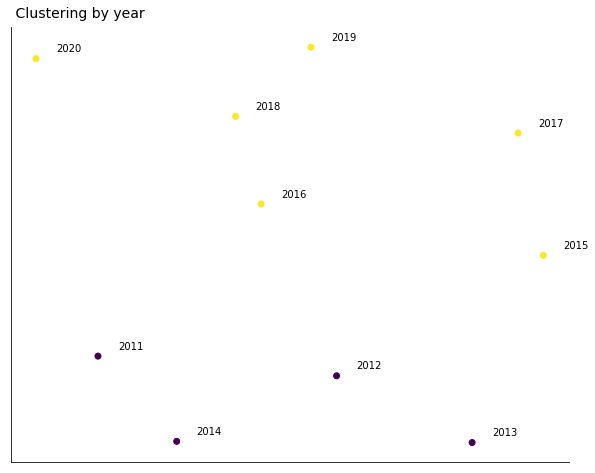

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(umap_by_year[:,0], umap_by_year[:,1], c=model.labels_)

for x,y,z in zip(umap_by_year[:,0], umap_by_year[:,1], topics_by_year.index):
    label = "{}".format(int(z))
    plt.annotate(label, (x+0.05,y+0.05))
sns.despine()
plt.xticks([])
plt.yticks([])
plt.title(" Clustering by year", fontdict={'fontsize':14}, loc='left', pad=10)
plt.show()

Agglomerative clustering proves this point as well.

# Topic profiles (landscapes)

In [19]:
def profile_plot(theme_profile, option, themes=themes_20):
    """
    Building topic profiles for each option
    theme_profiles (dict)
    themes (dict)
    """
    sorted_prof = sorted(theme_profile, key=lambda w: w[1], reverse=True)   
    # рисуем картинку
    sns.set(font_scale=2)
    plt.subplots(figsize=(30, 40))
    
    prof = np.array([pr[1] for pr in sorted_prof]).reshape(1,-1)
    them = [themes[pr[0]] for pr in sorted_prof]
    
    #ax = plt.axes()    
    sns.heatmap(prof, square=True, annot=True, fmt=".2f", linewidths=0.1, 
                 cmap="YlGnBu", cbar=False, yticklabels='', xticklabels=them )
    plt.title('Topic profile for year {}: \n'.format(option))
    plt.show()

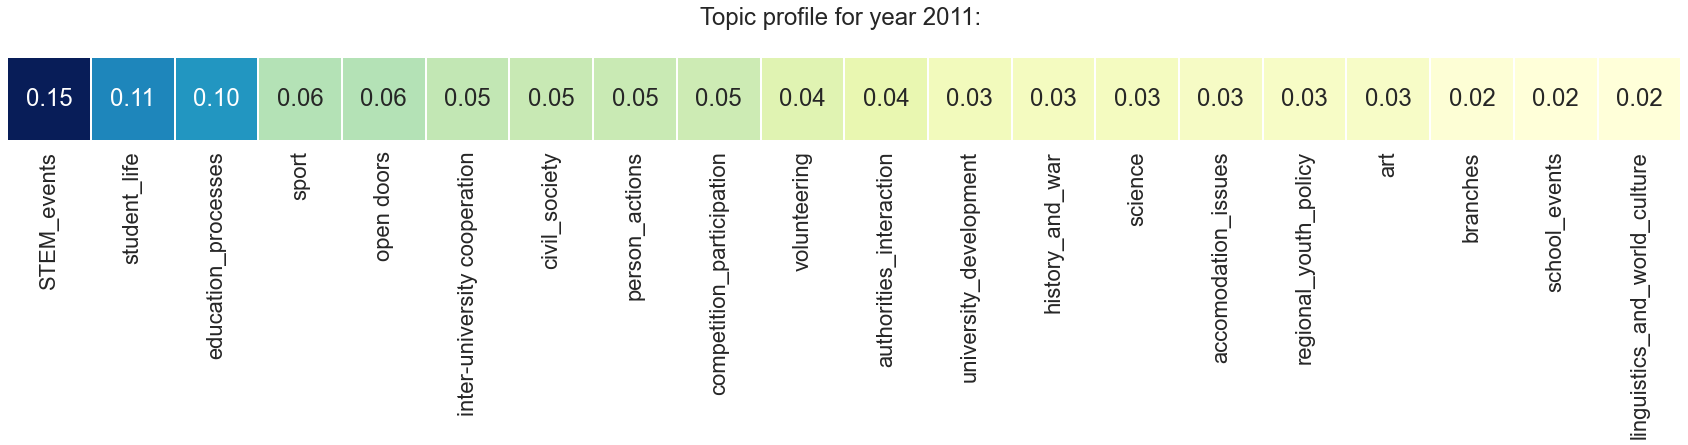

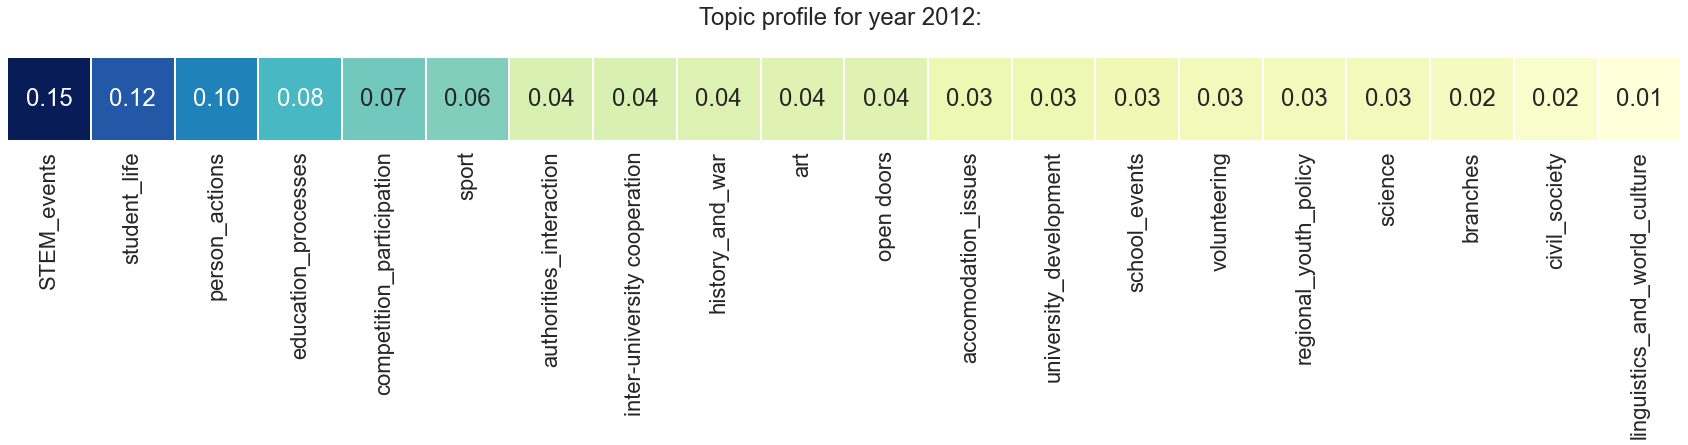

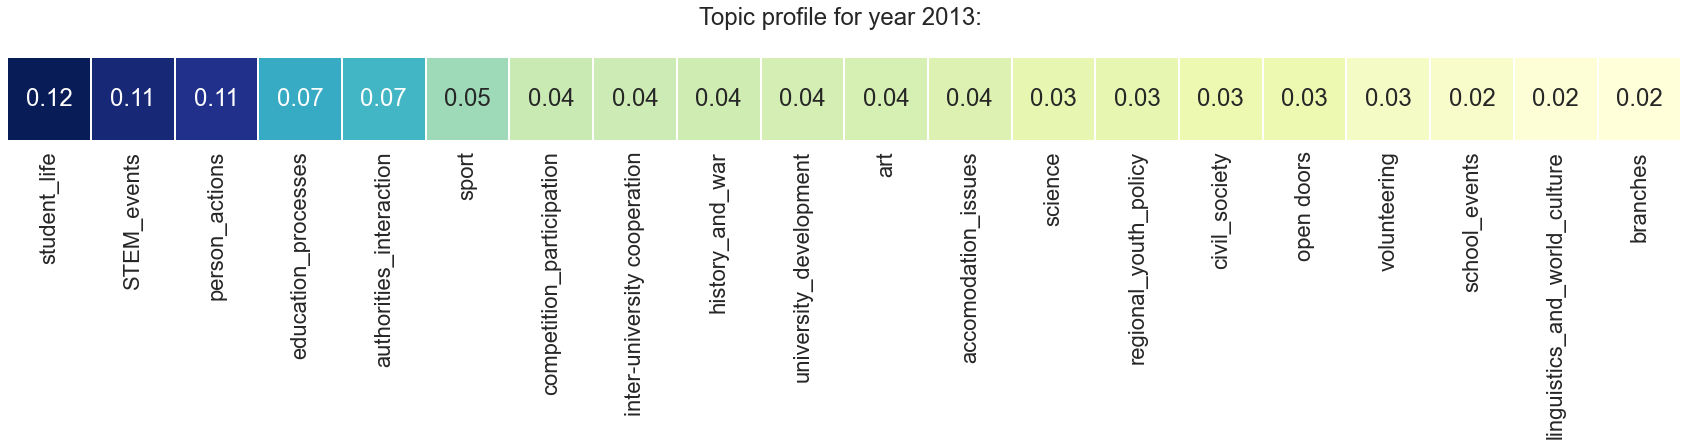

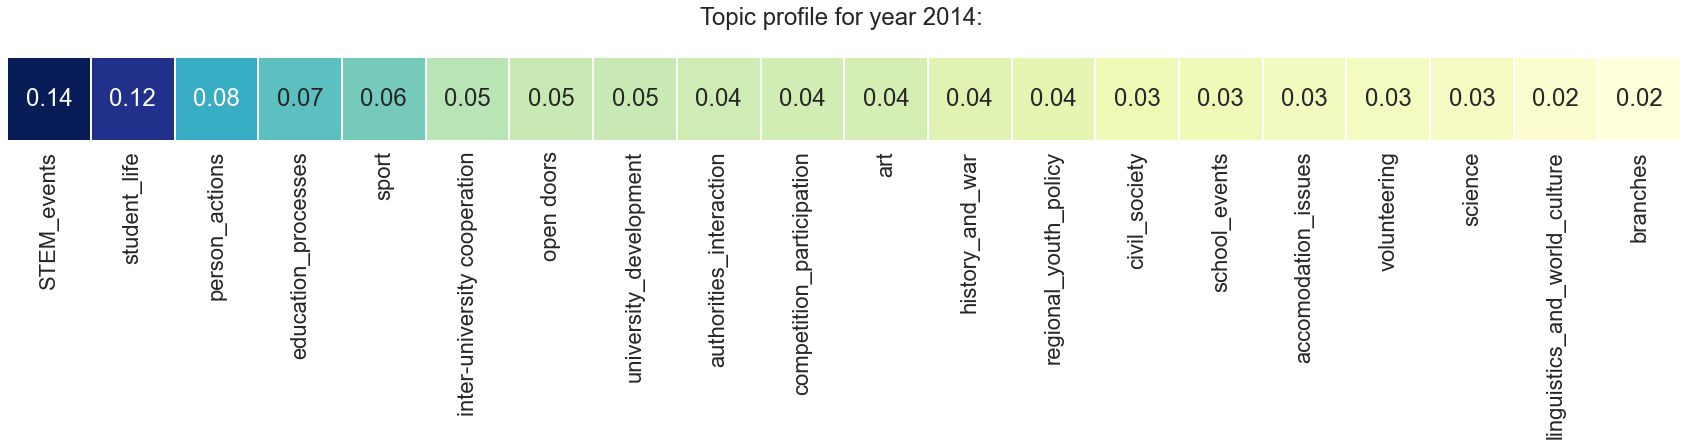

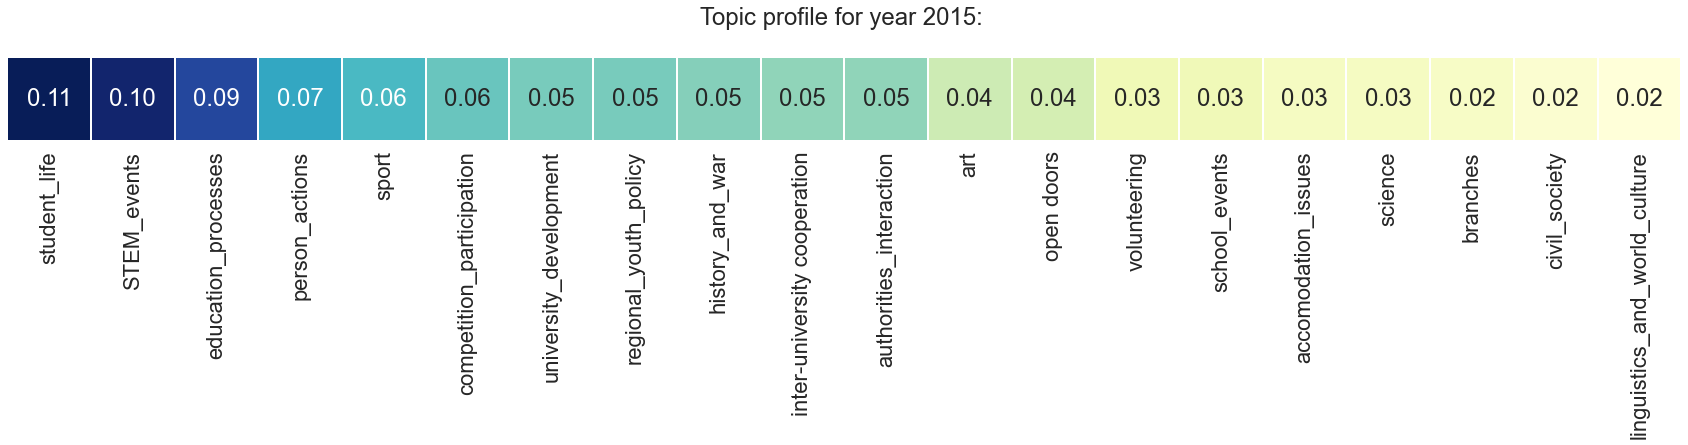

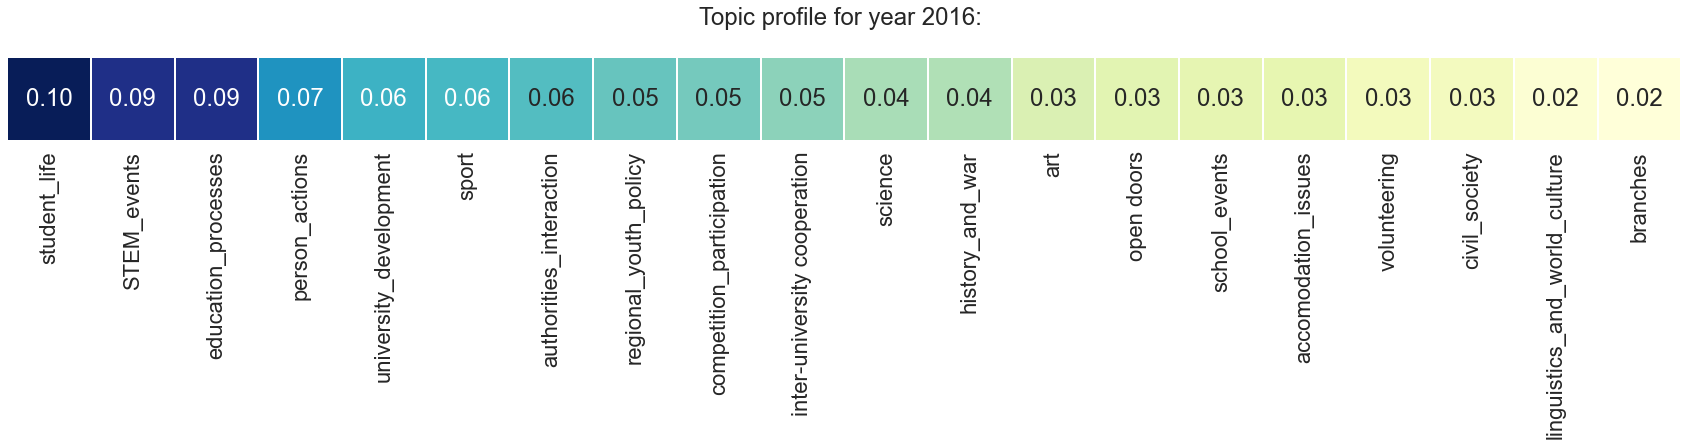

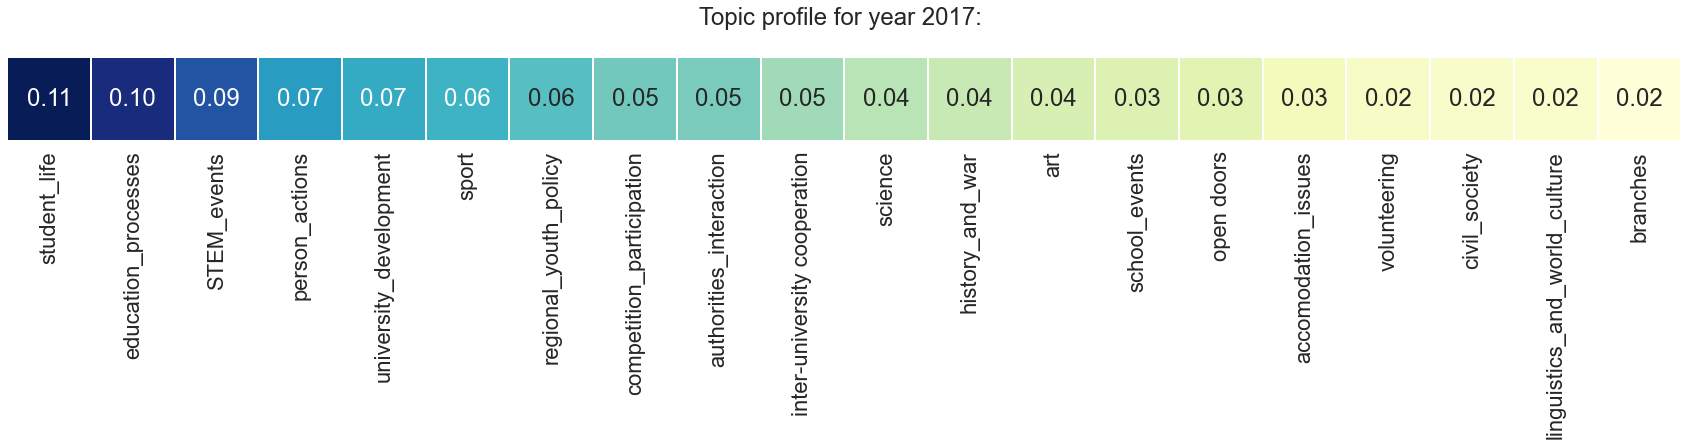

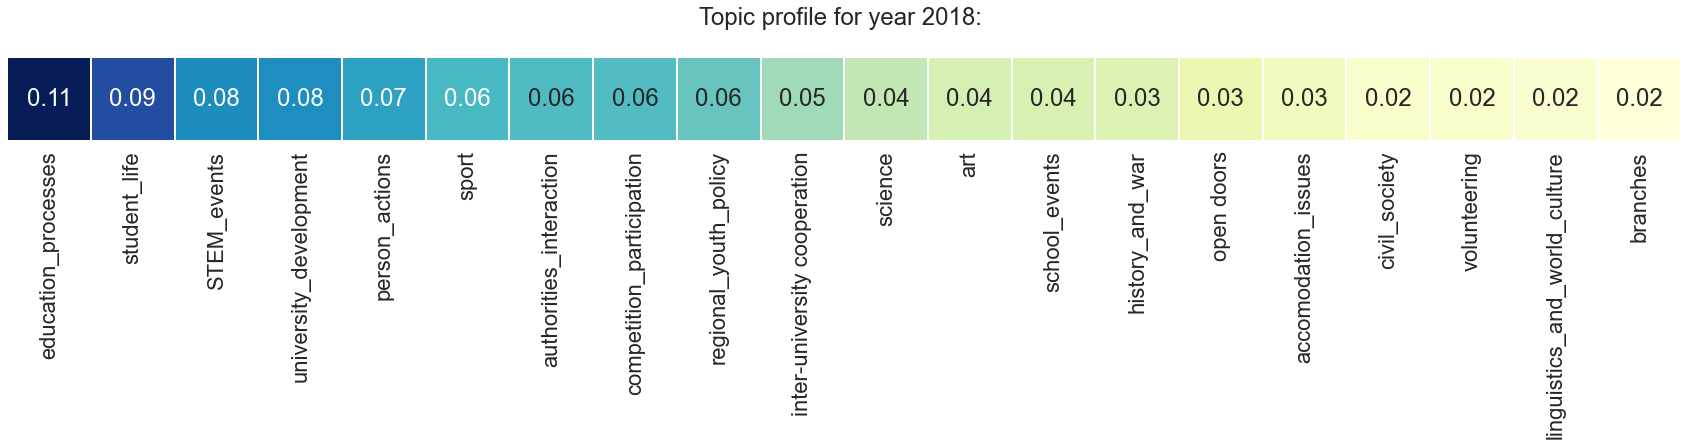

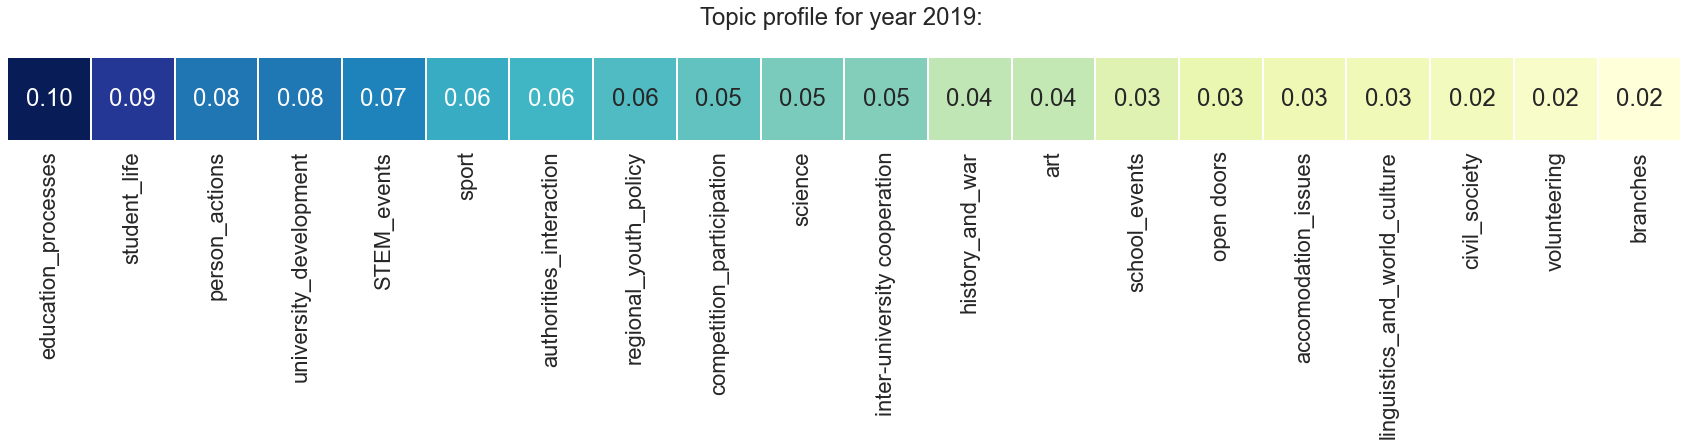

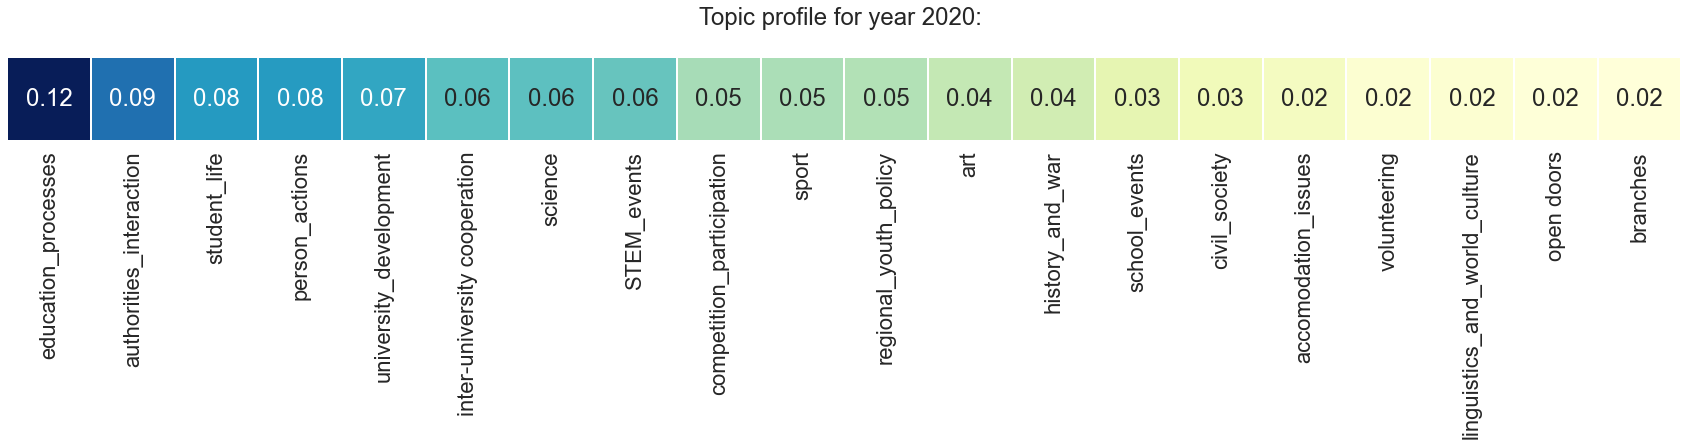

In [20]:
for year in range(2011, 2021):
    profile_plot(list(zip(topics_by_year.loc[year].index, topics_by_year.loc[year])), year)

The first thing that becomes evident from these profiles, the topic of science has moved from the end of the list to its beginning, while until 2015 this rate was not more than 3%. In 2020, 6% of all texts were written on this topic. Twice as often, 12% of texts are dedicated to education process (courses, lectures, timetable anouncements), which may be the rezult of online learning introduction. The topic of student life has been in top-2 each year since 2011 until 2020, when it stepped back on the 3rd place, presumably, because of pandemic lockdown. The topic of university development (new institutes/programs/courses creation, scientific conferences organization, etc.) has ben growing in scale since 2015, whereas until this time it was far from being a priority. This is a good sign. However, the output of the 5-100 Program may not be seen yet, as the new institutes, programs or courses, which have been created thanks to budgeting may take time to give sound rezults. On the graphs below, the dynamics of the topics is showed more clearly.

# How topics evolve through time

In [21]:
topics_to_remove = [
    #'человек_действия'
    'person_actions'
]


comparison_years = [
    [1, 2011, 2015, 'blue'],
    [2, 2015, 2020, 'yellow']
]

topics_by_year.columns = topics_by_year.columns.map(themes_20)

In [22]:
topics_by_year.columns

Index(['student_life', 'art', 'authorities_interaction', 'STEM_events',
       'school_events', 'sport', 'inter-university cooperation', 'open doors',
       'regional_youth_policy', 'education_processes',
       'linguistics_and_world_culture', 'accomodation_issues', 'volunteering',
       'competition_participation', 'civil_society', 'history_and_war',
       'person_actions', 'branches', 'science', 'university_development'],
      dtype='object')

No handles with labels found to put in legend.


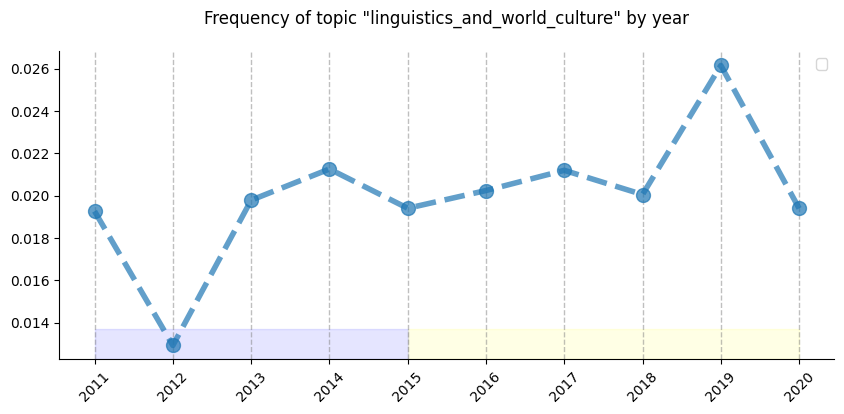

No handles with labels found to put in legend.


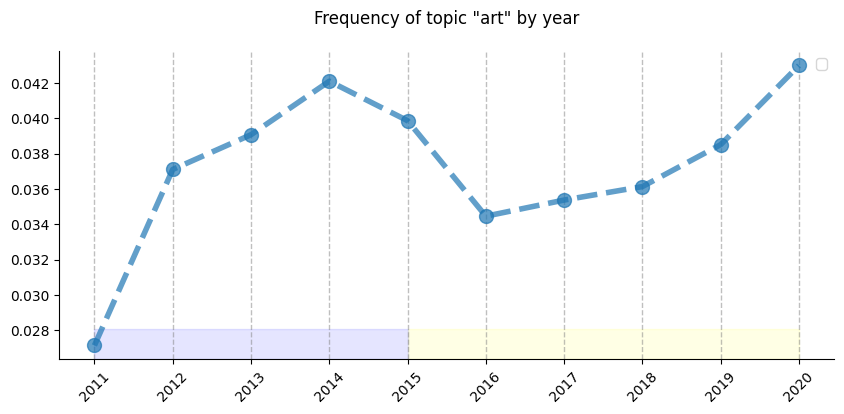

No handles with labels found to put in legend.


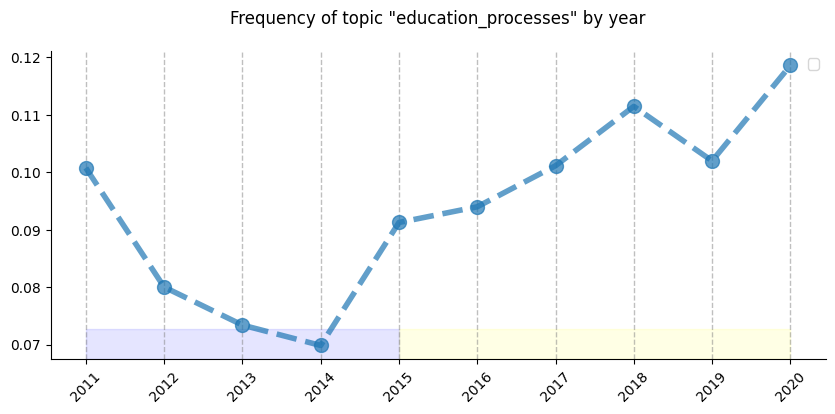

No handles with labels found to put in legend.


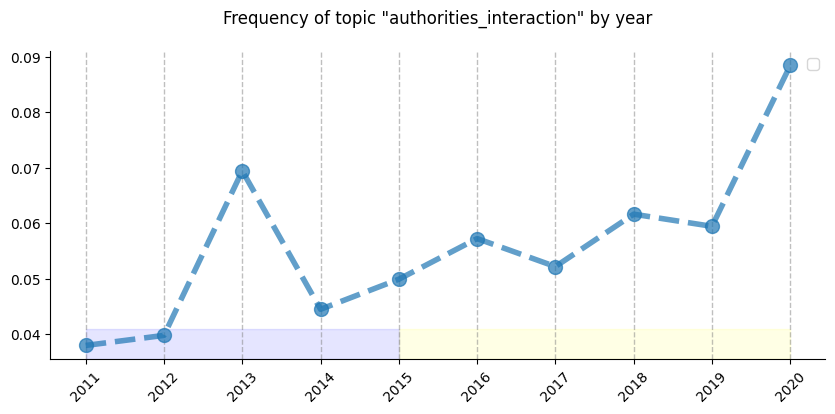

No handles with labels found to put in legend.


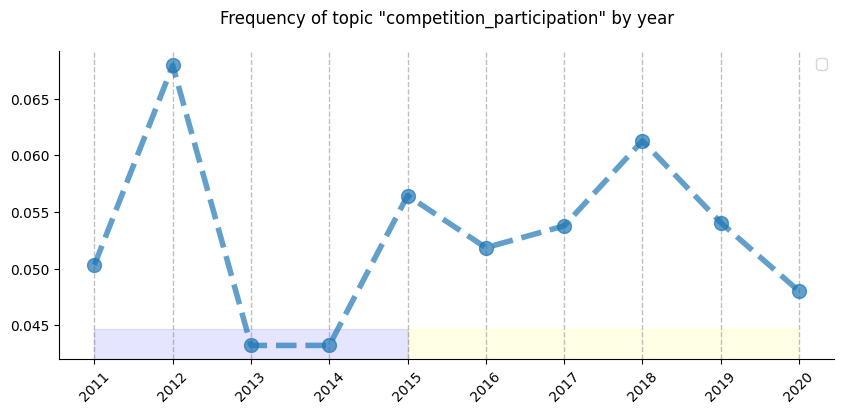

No handles with labels found to put in legend.


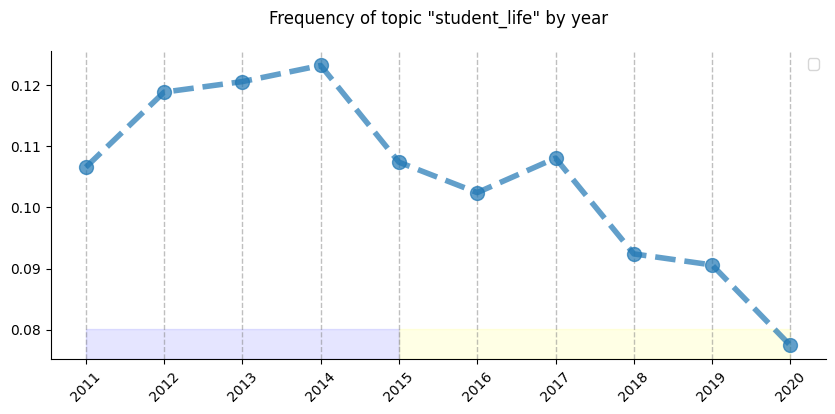

No handles with labels found to put in legend.


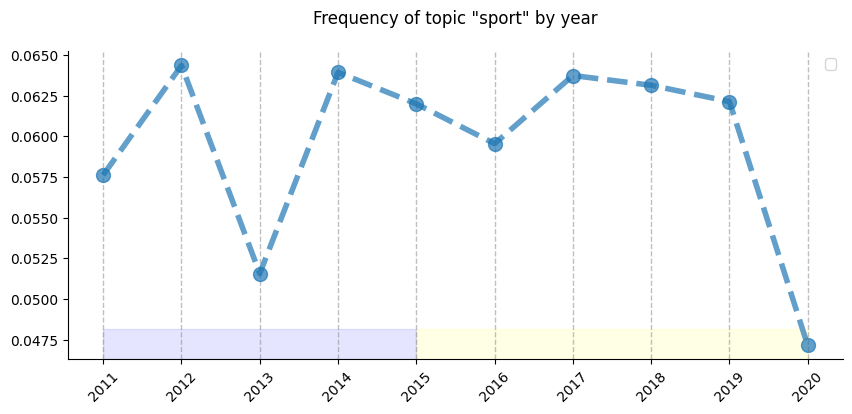

No handles with labels found to put in legend.


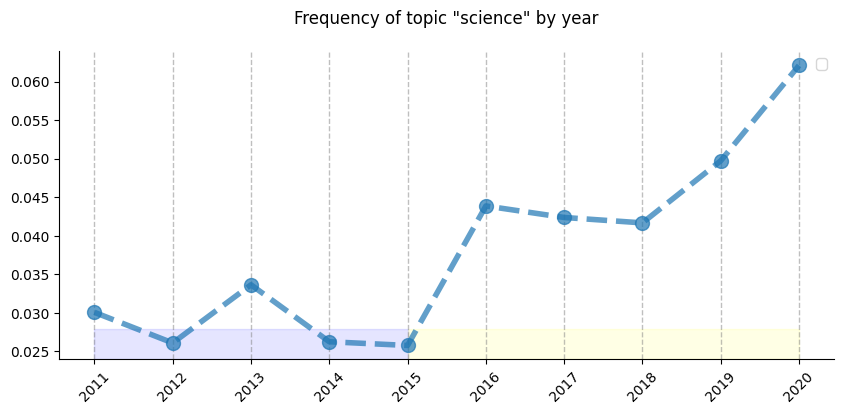

No handles with labels found to put in legend.


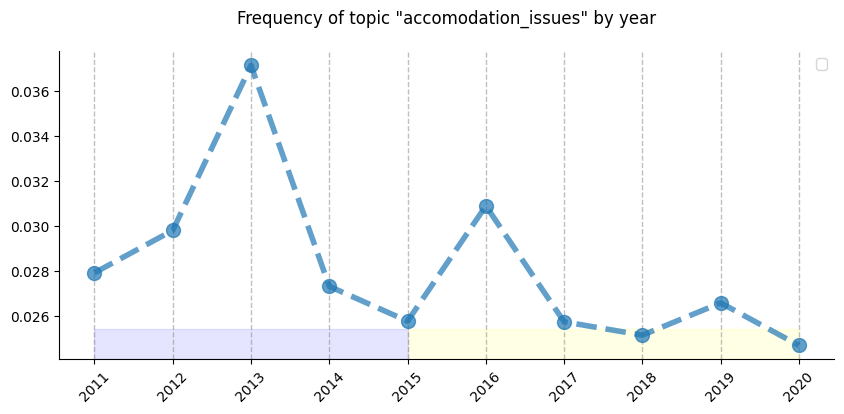

No handles with labels found to put in legend.


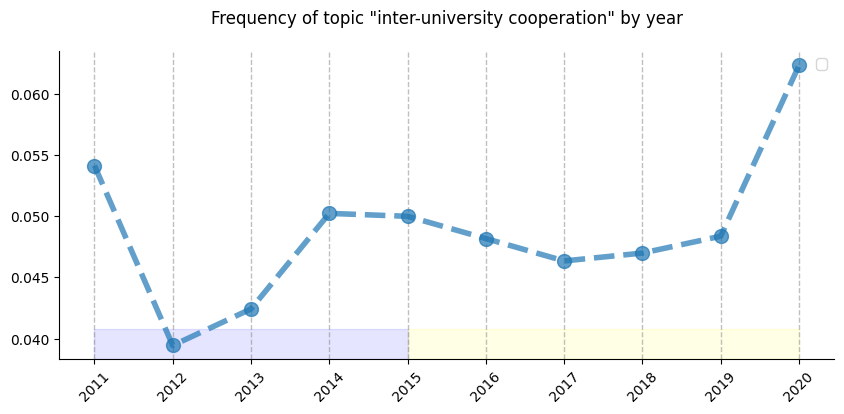

No handles with labels found to put in legend.


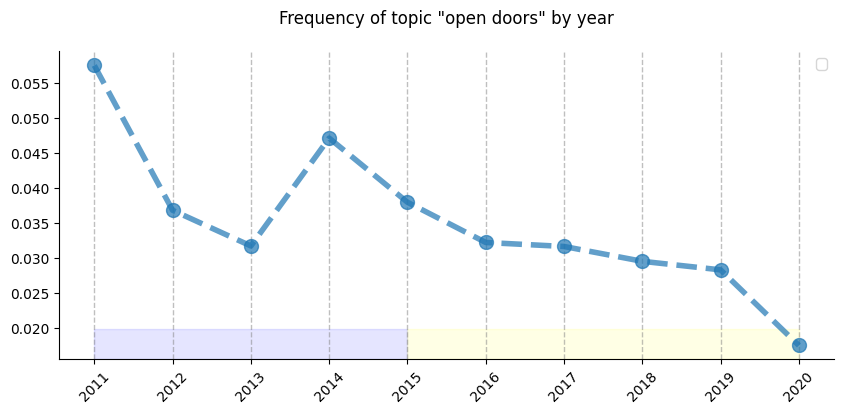

No handles with labels found to put in legend.


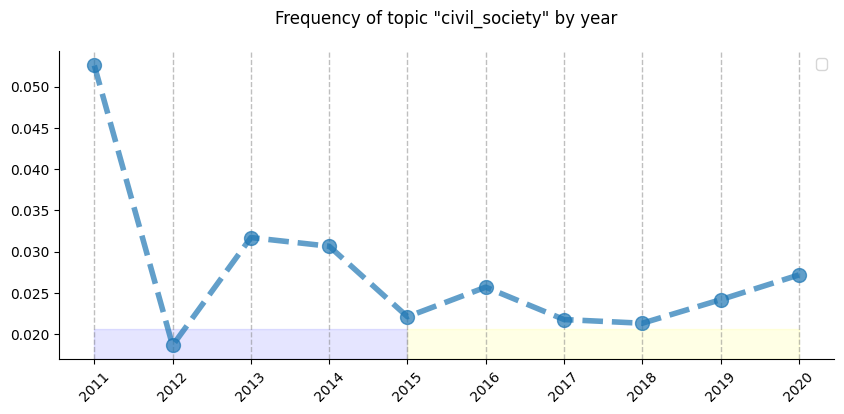

No handles with labels found to put in legend.


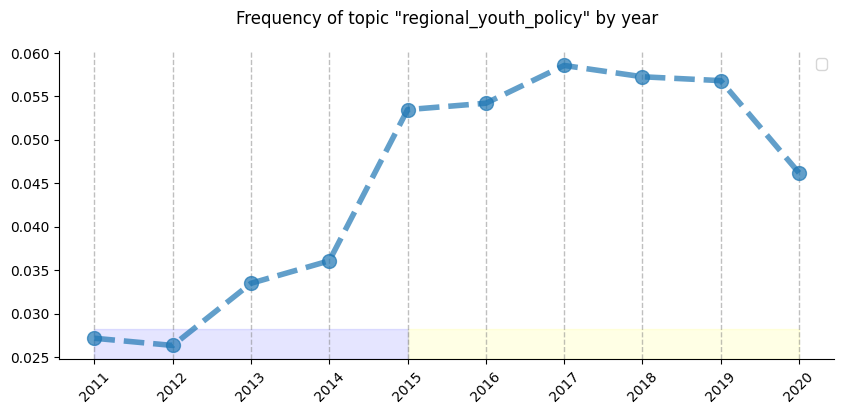

No handles with labels found to put in legend.


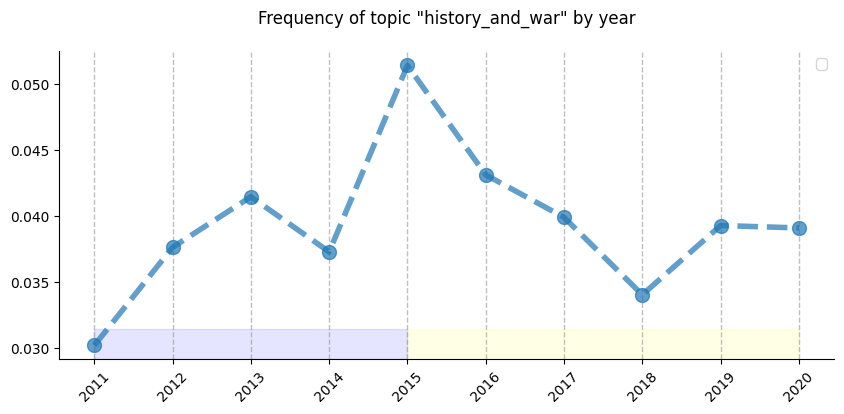

No handles with labels found to put in legend.


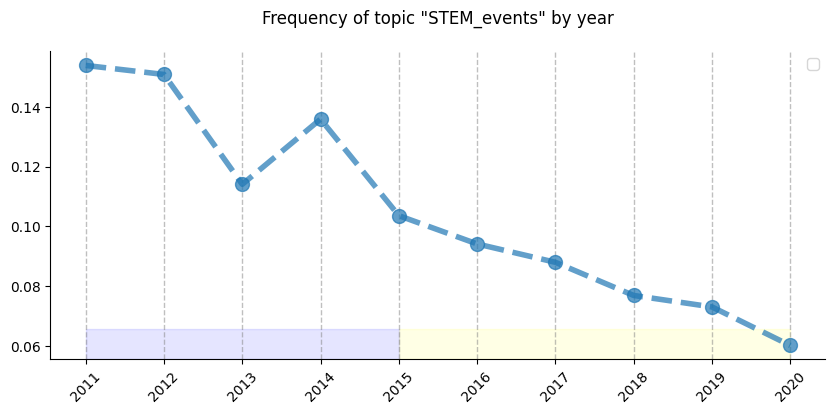

No handles with labels found to put in legend.


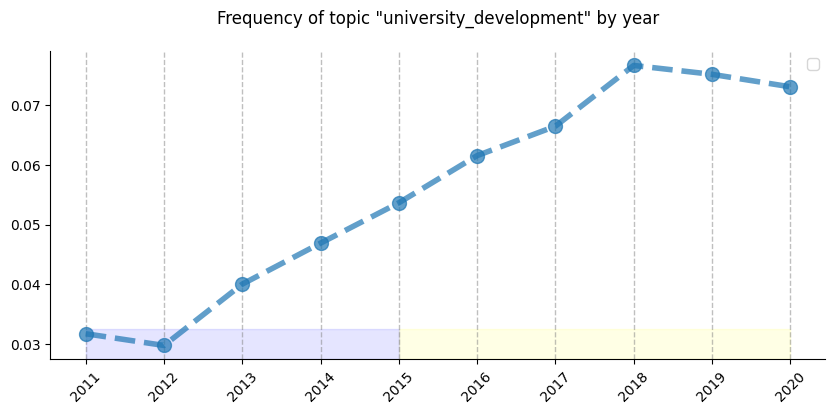

No handles with labels found to put in legend.


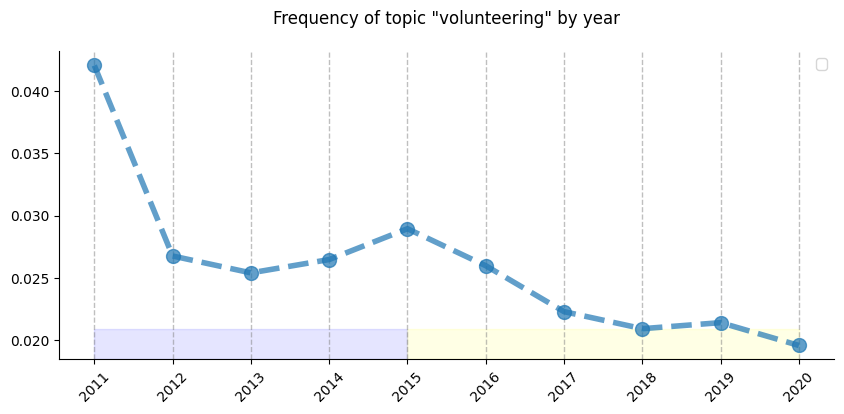

No handles with labels found to put in legend.


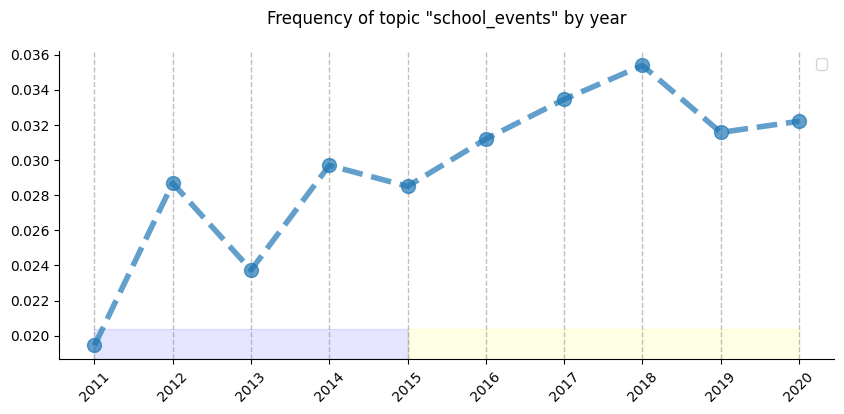

No handles with labels found to put in legend.


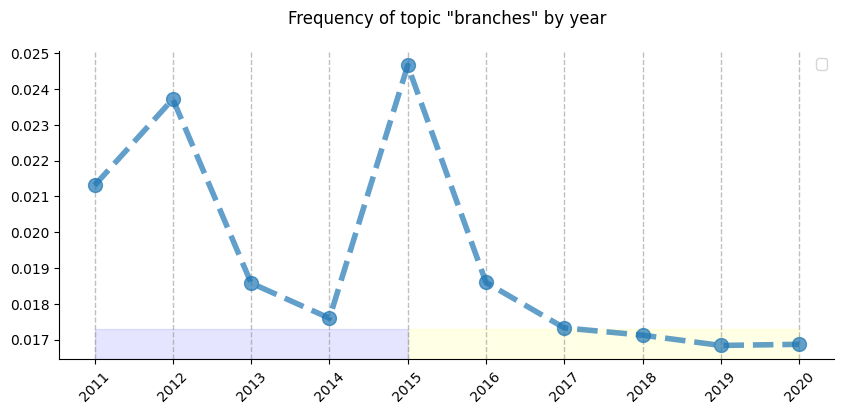

In [23]:
matplotlib.rc_file_defaults()
for topic in list(set(topics_by_year.columns)-set(topics_to_remove)):

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(
        topics_by_year[topic], 
        'o--', 
        linewidth=4, 
        markersize=10,
        alpha=0.7
    )
    plt.title(f'Frequency of topic "{topic}" by year', pad=20)
    #plt.ylabel("Частота")
    #plt.xlabel("Годы")
    plt.xticks(range(2011, 2021), rotation=45)
    for number, year_start, year_end, color in comparison_years:
        ax.axvspan(year_start, year_end, ymax=0.1, alpha=0.1, color=color)
    plt.grid(axis='x', linewidth=1, alpha=0.5, linestyle='dashed', color='grey')
    plt.legend()
    sns.despine()
    plt.show()
    print('\n')